1: Loading libraries and dataset

In [ ]:
# libraries
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
import os

In [ ]:
df_old = pd.read_csv('coc_clans_dataset.csv', index_col = 0)

In [ ]:
df_old.head()

,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,clan_versus_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,5213,...,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,1019,...,Unranked,1,0,0,1,0,0,Unranked,90,1752
#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,670,...,Unranked,2,0,0,1,0,0,Unranked,30,733
#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,457,...,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,399,...,Unranked,2,0,0,1,0,0,Unranked,23,674


In [ ]:
df_old.describe()

,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_win_streak,war_wins,war_ties,war_losses,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,mean_member_level,mean_member_trophies
count,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06
mean,2.349883e+00,2.576062e+03,2.562565e+03,2.562565e+03,3.760651e+02,2.082535e-01,1.750428e+01,2.143728e-01,9.981437e+00,4.758147e+00,2.305894e+02,2.305894e+02,2.195218e+00,5.651079e-01,6.836864e+01,4.884267e+01,8.971466e+02
std,3.298436e+00,5.863921e+03,5.866313e+03,5.866313e+03,8.334661e+02,1.016368e+00,6.050237e+01,1.355269e+00,3.696328e+01,8.287075e+00,7.362564e+02,7.362564e+02,2.733998e+00,1.607310e+00,3.652351e+02,3.868762e+01,5.874875e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.520000e+02,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,4.940000e+02
50%,1.000000e+00,6.930000e+02,6.470000e+02,6.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,7.900000e+02
75%,2.000000e+00,1.801000e+03,1.867000e+03,1.867000e+03,4.000000e+02,0.000000e+00,6.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+01,1.155000e+03
max,3.600000e+01,5.472100e+04,5.168600e+04,5.168600e+04,6.553500e+04,2.610000e+02,1.565000e+03,3.190000e+02,1.220000e+03,5.000000e+01,5.500000e+03,5.500000e+03,1.500000e+01,1.000000e+01,5.866000e+03,3.150000e+02,5.466000e+03


2. Data cleaning! This includes:
- removing NaN values/columns
- removing qualitative columns
- transforming features with categorical values
  - one-hot and ordinal encoding

In [ ]:
df_old.isnull().sum()

clan_name                              62
clan_type                               0
clan_description                  1351365
clan_location                     1451672
isFamilyFriendly                        0
clan_badge_url                          0
clan_level                              0
clan_points                             0
clan_builder_base_points                0
clan_versus_points                      0
required_trophies                       0
war_frequency                           0
war_win_streak                          0
war_wins                                0
war_ties                                0
war_losses                              0
clan_war_league                         0
num_members                             0
required_builder_base_trophies          0
required_versus_trophies                0
required_townhall_level                 0
clan_capital_hall_level                 0
clan_capital_points                     0
capital_league                    

In [ ]:
# removing columns with qualitative data that we can't use, or just harder to work with (too many NaN values)
df = df_old.drop(columns=['clan_name', 'clan_description','clan_badge_url','clan_location', 'required_trophies',
                          'required_builder_base_trophies', 'required_versus_trophies', 'required_townhall_level'], axis=1)
df

,clan_type,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_frequency,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,num_members,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
clan_tag,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,closed,True,6,6887,5213,5213,moreThanOncePerWeek,1,93,0,31,Unranked,11,1,0,Unranked,83,1254
#2QC9Y0CQU,open,True,1,876,1019,1019,unknown,0,0,0,0,Unranked,1,0,0,Unranked,90,1752
#202CJRP2U,open,True,1,732,670,670,always,1,1,0,0,Unranked,2,0,0,Unranked,30,733
#2Y89RRGLY,open,True,2,1156,457,457,always,0,7,0,11,Bronze League I,2,1,0,Unranked,61,1156
#99PU9QPY,open,True,2,674,399,399,always,0,3,0,11,Unranked,2,0,0,Unranked,23,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,open,False,1,332,141,141,moreThanOncePerWeek,0,0,0,0,Unranked,2,0,0,Unranked,8,332
#VUV2URJ,open,False,1,317,71,71,unknown,0,0,0,0,Unranked,1,0,0,Unranked,12,635
#22C2PCPUG,open,False,1,379,338,338,unknown,0,0,0,1,Unranked,2,0,0,Unranked,17,379


In [ ]:
"""
Now we transform features that are not numerical using different types of encoding.
Features with natural ordering:
clan_war_league
capital_league

Features with non-natural ordering:
war_frequency
clan_type

Boolean features:
isFamilyFriendly

"""
# boolean conversion to int
df['isFamilyFriendly'] = df['isFamilyFriendly'].astype(int)

# ordinal encoding of clan_war_league
unique = set(df["clan_war_league"])
unique

{'Bronze League I',
 'Bronze League II',
 'Bronze League III',
 'Champion League I',
 'Champion League II',
 'Champion League III',
 'Crystal League I',
 'Crystal League II',
 'Crystal League III',
 'Gold League I',
 'Gold League II',
 'Gold League III',
 'Master League I',
 'Master League II',
 'Master League III',
 'Silver League I',
 'Silver League II',
 'Silver League III',
 'Unranked'}

In [ ]:
war_league_scale = {"Unranked":0, "Bronze League I":1, "Bronze League II":2, "Bronze League III":3, "Silver League I":4, "Silver League II":5, "Silver League III":6, "Gold League I":7, "Gold League II":8, "Gold League III":9, "Crystal League I":10, "Crystal League II":11, "Crystal League III":12, "Master League I":13, "Master League II":14, "Master League III":15, "Champion League I":16, "Champion League II":17, "Champion League III":18}

In [ ]:
df["clan_war_league"] = df["clan_war_league"].replace(war_league_scale)
df["clan_war_league"]
df

clan_tag
#UQVQRJQ0      0
#2QC9Y0CQU     0
#202CJRP2U     0
#2Y89RRGLY     1
#99PU9QPY      0
              ..
#JP9Q8QQU      0
#VUV2URJ       0
#22C2PCPUG     0
#2YU8QJJU8    11
#2YRU29GGL     0
Name: clan_war_league, Length: 3559743, dtype: int64

In [ ]:
# ordinal encoding of capital_league
unique = set(df["capital_league"])
unique

{'Bronze League I',
 'Bronze League II',
 'Bronze League III',
 'Champion League I',
 'Champion League II',
 'Champion League III',
 'Crystal League I',
 'Crystal League II',
 'Crystal League III',
 'Gold League I',
 'Gold League II',
 'Gold League III',
 'Legend League',
 'Master League I',
 'Master League II',
 'Master League III',
 'Silver League I',
 'Silver League II',
 'Silver League III',
 'Titan League I',
 'Titan League II',
 'Titan League III',
 'Unranked'}

In [ ]:
capital_league_scale = {"Unranked":0, "Bronze League I":1, "Bronze League II":2, "Bronze League III":3, "Silver League I":4, "Silver League II":5, "Silver League III":6, "Gold League I":7, "Gold League II":8, "Gold League III":9, "Crystal League I":10, "Crystal League II":11, "Crystal League III":12, "Master League I":13, "Master League II":14, "Master League III":15, "Champion League I":16, "Champion League II":17, "Champion League III":18, "Titan League I":19, "Titan League II":20, "Titan League III":21,"Legend League":22}
df["capital_league"] = df["capital_league"].replace(capital_league_scale)
df["capital_league"]

clan_tag
#UQVQRJQ0     0
#2QC9Y0CQU    0
#202CJRP2U    0
#2Y89RRGLY    0
#99PU9QPY     0
             ..
#JP9Q8QQU     0
#VUV2URJ      0
#22C2PCPUG    0
#2YU8QJJU8    0
#2YRU29GGL    0
Name: capital_league, Length: 3559743, dtype: int64

In [ ]:
# one-hot encoding war_frequency
df = pd.get_dummies(df, columns=['war_frequency', ])
df['war_frequency_always'] = df['war_frequency_always'].astype(int)
df['war_frequency_lessThanOncePerWeek'] = df['war_frequency_lessThanOncePerWeek'].astype(int)
df['war_frequency_moreThanOncePerWeek'] = df['war_frequency_moreThanOncePerWeek'].astype(int)
df['war_frequency_never'] = df['war_frequency_never'].astype(int)
df['war_frequency_oncePerWeek'] = df['war_frequency_oncePerWeek'].astype(int)
df['war_frequency_unknown'] = df['war_frequency_unknown'].astype(int)
df

,clan_type,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,...,clan_capital_points,capital_league,mean_member_level,mean_member_trophies,war_frequency_always,war_frequency_lessThanOncePerWeek,war_frequency_moreThanOncePerWeek,war_frequency_never,war_frequency_oncePerWeek,war_frequency_unknown
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,closed,1,6,6887,5213,5213,1,93,0,31,...,0,0,83,1254,0,0,1,0,0,0
#2QC9Y0CQU,open,1,1,876,1019,1019,0,0,0,0,...,0,0,90,1752,0,0,0,0,0,1
#202CJRP2U,open,1,1,732,670,670,1,1,0,0,...,0,0,30,733,1,0,0,0,0,0
#2Y89RRGLY,open,1,2,1156,457,457,0,7,0,11,...,0,0,61,1156,1,0,0,0,0,0
#99PU9QPY,open,1,2,674,399,399,0,3,0,11,...,0,0,23,674,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,open,0,1,332,141,141,0,0,0,0,...,0,0,8,332,0,0,1,0,0,0
#VUV2URJ,open,0,1,317,71,71,0,0,0,0,...,0,0,12,635,0,0,0,0,0,1
#22C2PCPUG,open,0,1,379,338,338,0,0,0,1,...,0,0,17,379,0,0,0,0,0,1


In [ ]:
# one-hot encoding clan_type
df = pd.get_dummies(df, columns=['clan_type', ])
df['clan_type_closed'] = df['clan_type_closed'].astype(int)
df['clan_type_inviteOnly'] = df['clan_type_inviteOnly'].astype(int)
df['clan_type_open'] = df['clan_type_open'].astype(int)
df

,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,...,mean_member_trophies,war_frequency_always,war_frequency_lessThanOncePerWeek,war_frequency_moreThanOncePerWeek,war_frequency_never,war_frequency_oncePerWeek,war_frequency_unknown,clan_type_closed,clan_type_inviteOnly,clan_type_open
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,1,6,6887,5213,5213,1,93,0,31,0,...,1254,0,0,1,0,0,0,1,0,0
#2QC9Y0CQU,1,1,876,1019,1019,0,0,0,0,0,...,1752,0,0,0,0,0,1,0,0,1
#202CJRP2U,1,1,732,670,670,1,1,0,0,0,...,733,1,0,0,0,0,0,0,0,1
#2Y89RRGLY,1,2,1156,457,457,0,7,0,11,1,...,1156,1,0,0,0,0,0,0,0,1
#99PU9QPY,1,2,674,399,399,0,3,0,11,0,...,674,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,0,1,332,141,141,0,0,0,0,0,...,332,0,0,1,0,0,0,0,0,1
#VUV2URJ,0,1,317,71,71,0,0,0,0,0,...,635,0,0,0,0,0,1,0,0,1
#22C2PCPUG,0,1,379,338,338,0,0,0,1,0,...,379,0,0,0,0,0,1,0,0,1


3. Pre-processing! Our pre-processing includes:
- Removing highly-correlated features
  - Avoid multicollinearity
- Splitting data into test/train sets
  - randomly sampling ~ 1K clans
  - undersampling: majority of data is weaker clans

In [ ]:
# check correlatation between clan points and other potential features
corr = df[['clan_points', 'clan_capital_points', 'clan_level', 'clan_builder_base_points', 'clan_versus_points', 'war_win_streak','war_wins', 'war_ties', 'war_losses', 'num_members', 'mean_member_level', 'mean_member_trophies', 'clan_capital_hall_level']].corr()
corr.style.background_gradient(cmap='coolwarm')
# Note: this doesn't include the correlation values for columns with categorical data. We will deal with those later.

,clan_points,clan_capital_points,clan_level,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,num_members,mean_member_level,mean_member_trophies,clan_capital_hall_level
clan_points,1.000000,0.862496,0.824389,0.987212,0.987212,0.223504,0.680949,0.180780,0.471435,0.920488,0.605944,0.706063,0.913003
clan_capital_points,0.862496,1.000000,0.710951,0.831638,0.831638,0.201750,0.607014,0.132898,0.372918,0.737654,0.465679,0.577706,0.823345
clan_level,0.824389,0.710951,1.000000,0.816230,0.816230,0.222638,0.902491,0.297198,0.620996,0.720731,0.595113,0.640521,0.826961
clan_builder_base_points,0.987212,0.831638,0.816230,1.000000,1.000000,0.216458,0.667594,0.178884,0.471627,0.922360,0.621181,0.706672,0.910841
clan_versus_points,0.987212,0.831638,0.816230,1.000000,1.000000,0.216458,0.667594,0.178884,0.471627,0.922360,0.621181,0.706672,0.910841
war_win_streak,0.223504,0.201750,0.222638,0.216458,0.216458,1.000000,0.196406,0.077511,0.081841,0.221279,0.138575,0.155757,0.230910
war_wins,0.680949,0.607014,0.902491,0.667594,0.667594,0.196406,1.000000,0.324560,0.596809,0.568323,0.500557,0.530740,0.662279
war_ties,0.180780,0.132898,0.297198,0.178884,0.178884,0.077511,0.324560,1.000000,0.395787,0.174496,0.163385,0.151579,0.190822
war_losses,0.471435,0.372918,0.620996,0.471627,0.471627,0.081841,0.596809,0.395787,1.000000,0.419300,0.355180,0.374324,0.465148
num_members,0.920488,0.737654,0.720731,0.922360,0.922360,0.221279,0.568323,0.174496,0.419300,1.000000,0.457812,0.541583,0.830745


In [ ]:
# Based on the above correlations, we can assume that clan_versus_points
# and clan_builder_base_points are the same, so we can remove one.
df = df.drop(columns=['clan_versus_points'], axis=1)
# It seems that some variables are highly correlated with our target variable and each other, so let's remove those.
# This is not really important for linear regression lol
# df = df.drop(columns=['clan_builder_base_points', 'num_members', 'clan_capital_hall_level'], axis=1)
# We may experiment with adding these columns back later

In [ ]:
df.columns

Index(['isFamilyFriendly', 'clan_level', 'clan_points',
       'clan_builder_base_points', 'war_win_streak', 'war_wins', 'war_ties',
       'war_losses', 'clan_war_league', 'num_members',
       'clan_capital_hall_level', 'clan_capital_points', 'capital_league',
       'mean_member_level', 'mean_member_trophies', 'war_frequency_always',
       'war_frequency_lessThanOncePerWeek',
       'war_frequency_moreThanOncePerWeek', 'war_frequency_never',
       'war_frequency_oncePerWeek', 'war_frequency_unknown',
       'clan_type_closed', 'clan_type_inviteOnly', 'clan_type_open'],
      dtype='object')

In [ ]:
# Now we can split the data and randomly select ~1000 features!

df_sample = df.sample(n=1000)

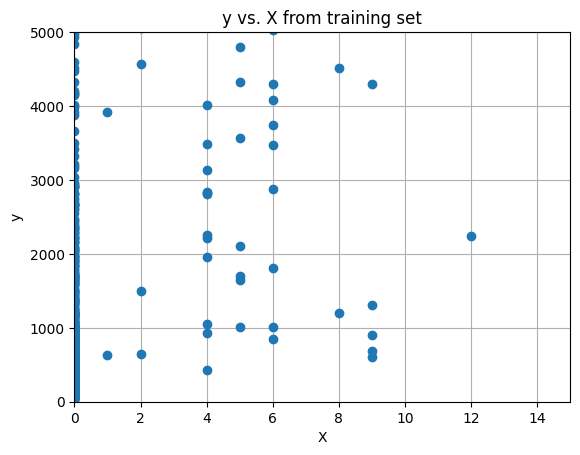

In [ ]:
features = ['clan_war_league']

# Starting with a column of ones for a w_0 term
X = np.ones((1000,1))

# We can choose any single feature for prediction - we can try the most correlated feature first
X = df_sample['clan_war_league'].to_numpy()
# y = df_sample['clan_points'].to_numpy()

# for feature in features:
#   new_col = df_sample[feature].to_numpy()
#   new_col = new_col.reshape(new_col.shape[0], 1)
#   # print(new_col.shape)
#   X = np.append(X, new_col, axis=1)
#   # print(X.shape)
y = df_sample['clan_points'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

# Let's plot X_train and y_train to see the distribution of training data
plt.plot(X_train,y_train,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0,5000)
plt.xlim(0,15)
plt.grid(True)
plt.show(block=False)


In [ ]:
# Since most points are centered around the bottom of the graph, we need to make sure we
# are representing all data points properly, so we will undersample:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

y_test = y_test.reshape(y_test.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)
X_train.shape

(650, 1)

4. Linear Regression! This includes:
- Linear Regression on selected features
  - Uses closed-form solution
- Regularization
  - Added $\lambda$ parameter for L2 regularization
- Regularized LR w/ Polynomial Transformation
  - We want to create models of varying degrees and compare them!

In [ ]:
def poly_regression(X,y,lambda1):
    d = X.shape[1]
    N = X.shape[0]
    I = np.identity(d)
    I[0][0] = 0
    w = np.linalg.pinv(X.T.dot(X)+N*lambda1*I).dot(X.T).dot(y)
    return w


In [ ]:
# gets weights, e_in and e_out for each degree model
def poly_regression_ein_eout(model_degree, X_train, X_test, y_train, y_test, lambda1):
  for d in model_degree:
      print('Order: ', d)
      poly = PolynomialFeatures(d)
      X_tr_poly = poly.fit_transform(X_train)
      X_val_poly = poly.transform(X_test)

      w = poly_regression(X_tr_poly,y_train,lambda1)
      w_dict[d] = w

      yhat = X_tr_poly.dot(w)
      E_in = np.mean((yhat-y_train)**2)
      train_costs.append(E_in)

      yhat_val = X_val_poly.dot(w)
      E_val = np.mean((yhat_val-y_test)**2)
      validation_costs.append(E_val)

      print('w: ', w)
      print("X_tr_poly size:", X_tr_poly.shape)
      print("max:", np.max(X_tr_poly))
      print('E_in: ',E_in)
      print("E_val:", E_val)
      print('-------------------------')

In [ ]:
# plots each degree model (hypothesis) using calculate weights.
def poly_regression_plot_poly_models(model_degree, X_train, y_train):
  for d in model_degree:
      print('Degree: ', d)
      plt.plot(X_train, y_train, 'o')

      poly = PolynomialFeatures(d)
      xp = np.linspace(0,15,200).reshape(200, 1)
      xp_d = poly.fit_transform(xp)
      print(xp_d)
      yp_hat = xp_d.dot(w_dict[d])

      plt.plot(xp,yp_hat)
      plt.xlim(0,15)
      # for townhall
      # plt.xlim(0,10)
      plt.ylim(0,5000)

      plt.title('Training data & model of degree '+ str(d))
      plt.xlabel('X')
      plt.ylabel('y')
      plt.grid(True)
      plt.show(block=False)

For lambda = 0
Order:  1
w:  [ 954.26515625 1865.58330699]
X_tr_poly size: (650, 2)
max: 15.0
E_in:  16839944.659920704
E_val: 45362619.19415445
-------------------------
Order:  2
w:  [1185.19205688  478.73952043  137.77968259]
X_tr_poly size: (650, 3)
max: 225.0
E_in:  14968342.631868327
E_val: 41869343.73286389
-------------------------
Order:  3
w:  [1204.03201588  -65.98885673  261.63184359   -6.26098083]
X_tr_poly size: (650, 4)
max: 3375.0
E_in:  14918530.655587804
E_val: 42638880.21964071
-------------------------
Degree:  1
[[ 1.          0.        ]
 [ 1.          0.07537688]
 [ 1.          0.15075377]
 [ 1.          0.22613065]
 [ 1.          0.30150754]
 [ 1.          0.37688442]
 [ 1.          0.45226131]
 [ 1.          0.52763819]
 [ 1.          0.60301508]
 [ 1.          0.67839196]
 [ 1.          0.75376884]
 [ 1.          0.82914573]
 [ 1.          0.90452261]
 [ 1.          0.9798995 ]
 [ 1.          1.05527638]
 [ 1.          1.13065327]
 [ 1.          1.20603015]
 [

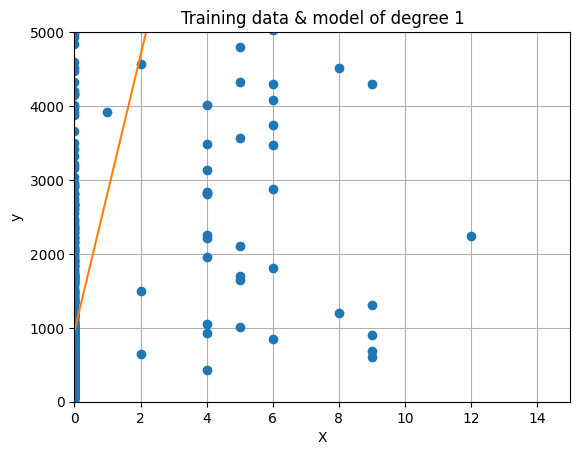

Degree:  2
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+00]
 [1.00000000e+00 1.20603015e+00 1.45450872e+00]
 [1.00000000e+00 1.28140704e+00 1.64200399e+00]
 [1.00000000e+00 1.35678392e+00 1.84086260e+00]
 [1.00000000e+00 1.43216080e+00 2.05108457e+00]
 [1.00000000e+00 1.50753769e+

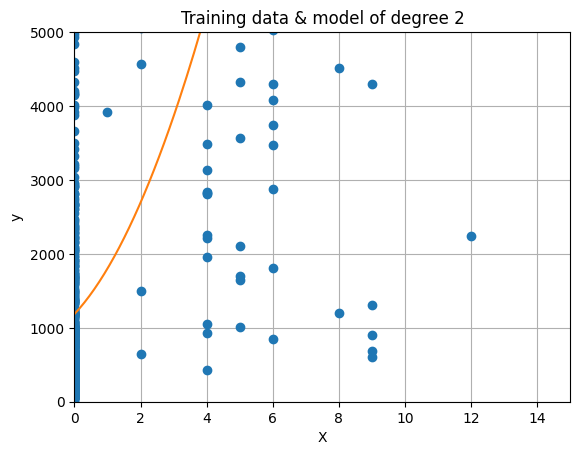

Degree:  3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03 4.28266938e-04]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02 3.42613550e-03]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02 1.15632073e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02 2.74090840e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01 5.35333672e-02]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01 9.25056585e-02]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01 1.46895560e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01 2.19272672e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01 3.12206597e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01 4.28266938e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01 5.70023294e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01 7.40045268e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01 9.40902462e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00 1.17516448e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+

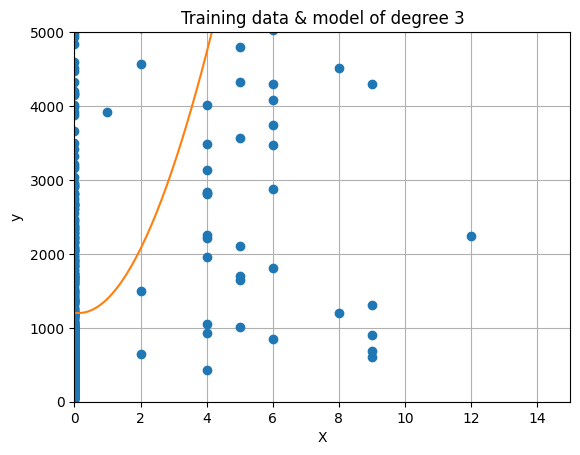

For lambda = 0.0001
Order:  1
w:  [ 954.29027583 1865.559712  ]
X_tr_poly size: (650, 2)
max: 15.0
E_in:  16839944.664322488
E_val: 45362116.58043704
-------------------------
Order:  2
w:  [1185.20645914  478.68568114  137.78442992]
X_tr_poly size: (650, 3)
max: 225.0
E_in:  14968342.63438013
E_val: 41869136.635632634
-------------------------
Order:  3
w:  [1204.02697125  -65.90384485  261.6139133    -6.26012184]
X_tr_poly size: (650, 4)
max: 3375.0
E_in:  14918530.65661768
E_val: 42638804.18574177
-------------------------
Degree:  1
[[ 1.          0.        ]
 [ 1.          0.07537688]
 [ 1.          0.15075377]
 [ 1.          0.22613065]
 [ 1.          0.30150754]
 [ 1.          0.37688442]
 [ 1.          0.45226131]
 [ 1.          0.52763819]
 [ 1.          0.60301508]
 [ 1.          0.67839196]
 [ 1.          0.75376884]
 [ 1.          0.82914573]
 [ 1.          0.90452261]
 [ 1.          0.9798995 ]
 [ 1.          1.05527638]
 [ 1.          1.13065327]
 [ 1.          1.20603015

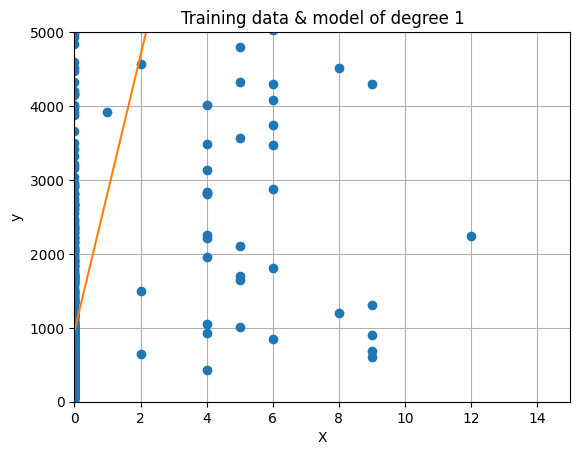

Degree:  2
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+00]
 [1.00000000e+00 1.20603015e+00 1.45450872e+00]
 [1.00000000e+00 1.28140704e+00 1.64200399e+00]
 [1.00000000e+00 1.35678392e+00 1.84086260e+00]
 [1.00000000e+00 1.43216080e+00 2.05108457e+00]
 [1.00000000e+00 1.50753769e+

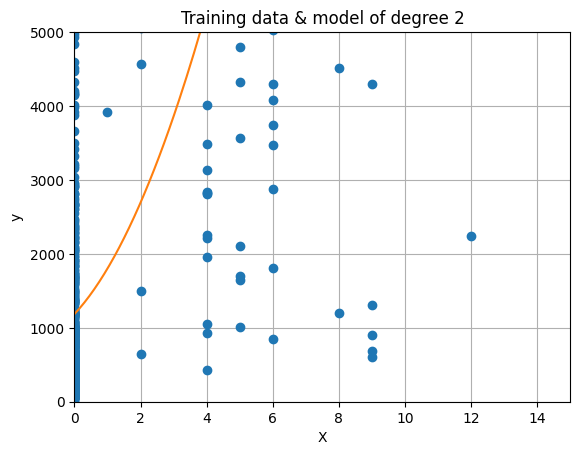

Degree:  3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03 4.28266938e-04]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02 3.42613550e-03]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02 1.15632073e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02 2.74090840e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01 5.35333672e-02]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01 9.25056585e-02]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01 1.46895560e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01 2.19272672e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01 3.12206597e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01 4.28266938e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01 5.70023294e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01 7.40045268e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01 9.40902462e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00 1.17516448e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+

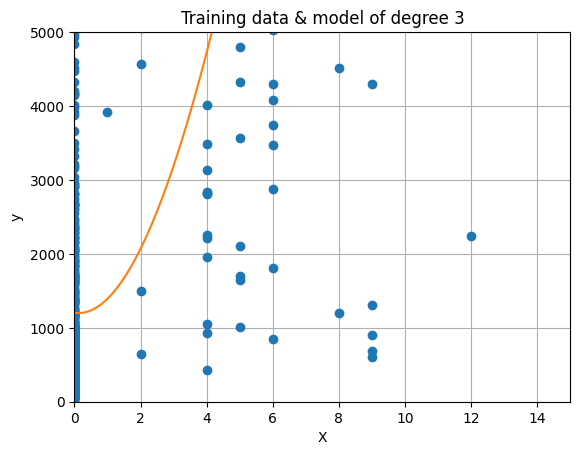

For lambda = 0.1
Order:  1
w:  [ 979.07131814 1842.2827214 ]
X_tr_poly size: (650, 2)
max: 15.0
E_in:  16844237.286543522
E_val: 44869427.78979207
-------------------------
Order:  2
w:  [1198.11388769  430.50428783  142.03080426]
X_tr_poly size: (650, 3)
max: 225.0
E_in:  14970358.800291061
E_val: 41684786.73301679
-------------------------
Order:  3
w:  [1201.54881959  -17.16527275  251.13447741   -5.75205314]
X_tr_poly size: (650, 4)
max: 3375.0
E_in:  14918878.380396098
E_val: 42586378.79304011
-------------------------
Degree:  1
[[ 1.          0.        ]
 [ 1.          0.07537688]
 [ 1.          0.15075377]
 [ 1.          0.22613065]
 [ 1.          0.30150754]
 [ 1.          0.37688442]
 [ 1.          0.45226131]
 [ 1.          0.52763819]
 [ 1.          0.60301508]
 [ 1.          0.67839196]
 [ 1.          0.75376884]
 [ 1.          0.82914573]
 [ 1.          0.90452261]
 [ 1.          0.9798995 ]
 [ 1.          1.05527638]
 [ 1.          1.13065327]
 [ 1.          1.20603015]


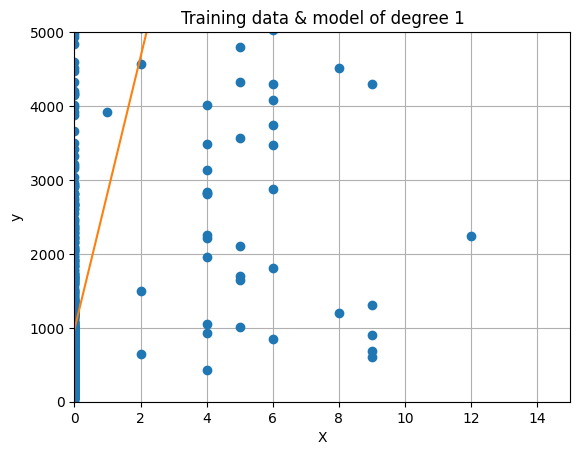

Degree:  2
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+00]
 [1.00000000e+00 1.20603015e+00 1.45450872e+00]
 [1.00000000e+00 1.28140704e+00 1.64200399e+00]
 [1.00000000e+00 1.35678392e+00 1.84086260e+00]
 [1.00000000e+00 1.43216080e+00 2.05108457e+00]
 [1.00000000e+00 1.50753769e+

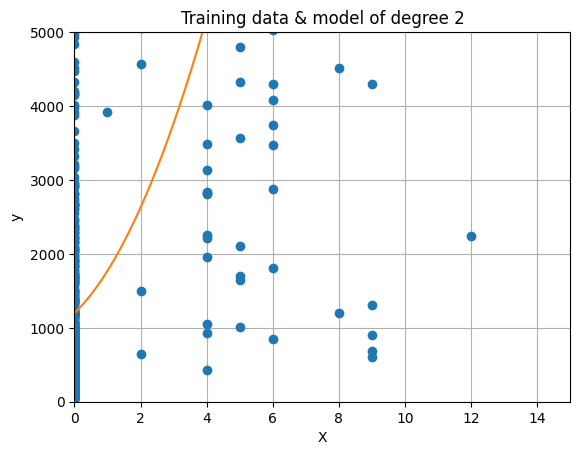

Degree:  3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03 4.28266938e-04]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02 3.42613550e-03]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02 1.15632073e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02 2.74090840e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01 5.35333672e-02]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01 9.25056585e-02]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01 1.46895560e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01 2.19272672e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01 3.12206597e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01 4.28266938e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01 5.70023294e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01 7.40045268e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01 9.40902462e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00 1.17516448e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+

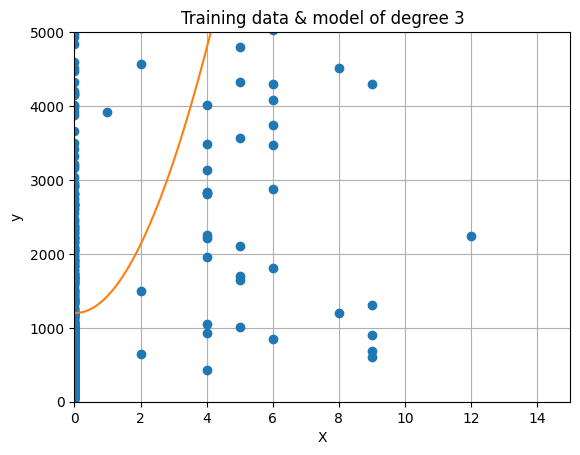

For lambda = 10
Order:  1
w:  [2063.4256592  823.7417941]
X_tr_poly size: (650, 2)
max: 15.0
E_in:  25422028.62989066
E_val: 29475708.70948438
-------------------------
Order:  2
w:  [1315.61001383   52.30343419  173.57309642]
X_tr_poly size: (650, 3)
max: 225.0
E_in:  15129255.612917965
E_val: 40038254.414232805
-------------------------
Order:  3
w:  [1278.60658288   39.57657733  200.37200915   -2.14898762]
X_tr_poly size: (650, 4)
max: 3375.0
E_in:  14999587.397231098
E_val: 40835587.3519033
-------------------------
Degree:  1
[[ 1.          0.        ]
 [ 1.          0.07537688]
 [ 1.          0.15075377]
 [ 1.          0.22613065]
 [ 1.          0.30150754]
 [ 1.          0.37688442]
 [ 1.          0.45226131]
 [ 1.          0.52763819]
 [ 1.          0.60301508]
 [ 1.          0.67839196]
 [ 1.          0.75376884]
 [ 1.          0.82914573]
 [ 1.          0.90452261]
 [ 1.          0.9798995 ]
 [ 1.          1.05527638]
 [ 1.          1.13065327]
 [ 1.          1.20603015]
 [ 1

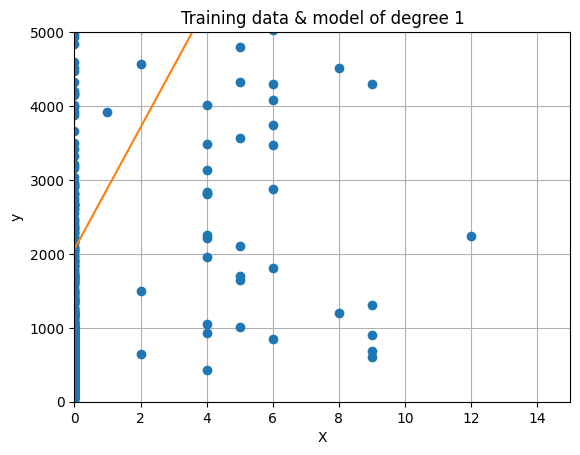

Degree:  2
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+00]
 [1.00000000e+00 1.20603015e+00 1.45450872e+00]
 [1.00000000e+00 1.28140704e+00 1.64200399e+00]
 [1.00000000e+00 1.35678392e+00 1.84086260e+00]
 [1.00000000e+00 1.43216080e+00 2.05108457e+00]
 [1.00000000e+00 1.50753769e+

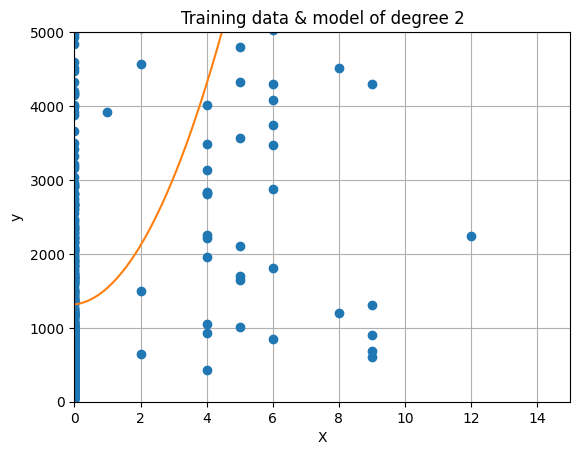

Degree:  3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03 4.28266938e-04]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02 3.42613550e-03]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02 1.15632073e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02 2.74090840e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01 5.35333672e-02]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01 9.25056585e-02]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01 1.46895560e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01 2.19272672e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01 3.12206597e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01 4.28266938e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01 5.70023294e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01 7.40045268e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01 9.40902462e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00 1.17516448e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+

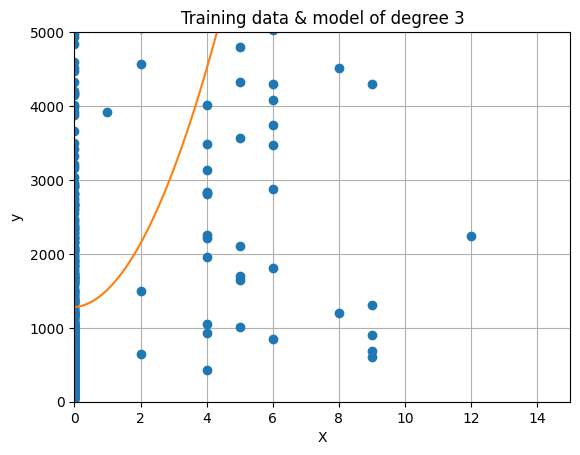

For lambda = 100
Order:  1
w:  [2794.86508138  136.69609408]
X_tr_poly size: (650, 2)
max: 15.0
E_in:  40473157.570143566
E_val: 25900160.032741413
-------------------------
Order:  2
w:  [1468.63817267   18.20253381  160.66116991]
X_tr_poly size: (650, 3)
max: 225.0
E_in:  15439019.98667595
E_val: 37465917.16516559
-------------------------
Order:  3
w:  [1534.66457777   16.72826118   82.57847962    7.18995829]
X_tr_poly size: (650, 4)
max: 3375.0
E_in:  16249083.587953668
E_val: 36228123.80679891
-------------------------
Degree:  1
[[ 1.          0.        ]
 [ 1.          0.07537688]
 [ 1.          0.15075377]
 [ 1.          0.22613065]
 [ 1.          0.30150754]
 [ 1.          0.37688442]
 [ 1.          0.45226131]
 [ 1.          0.52763819]
 [ 1.          0.60301508]
 [ 1.          0.67839196]
 [ 1.          0.75376884]
 [ 1.          0.82914573]
 [ 1.          0.90452261]
 [ 1.          0.9798995 ]
 [ 1.          1.05527638]
 [ 1.          1.13065327]
 [ 1.          1.20603015]


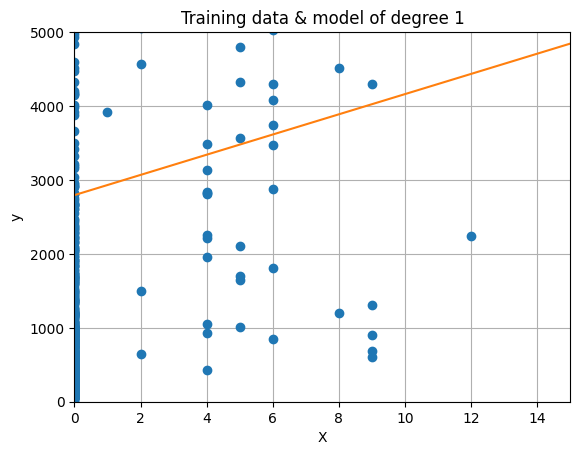

Degree:  2
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+00]
 [1.00000000e+00 1.20603015e+00 1.45450872e+00]
 [1.00000000e+00 1.28140704e+00 1.64200399e+00]
 [1.00000000e+00 1.35678392e+00 1.84086260e+00]
 [1.00000000e+00 1.43216080e+00 2.05108457e+00]
 [1.00000000e+00 1.50753769e+

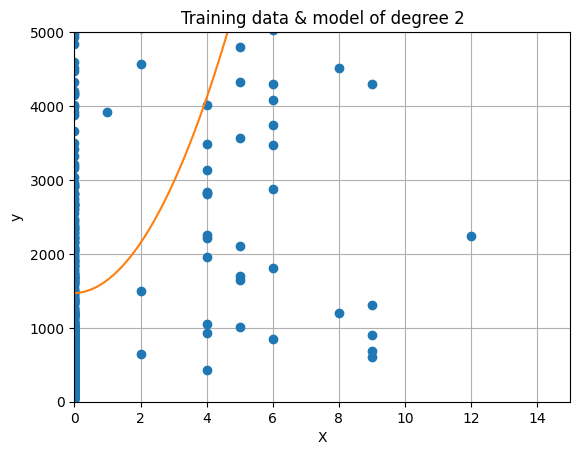

Degree:  3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03 4.28266938e-04]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02 3.42613550e-03]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02 1.15632073e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02 2.74090840e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01 5.35333672e-02]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01 9.25056585e-02]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01 1.46895560e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01 2.19272672e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01 3.12206597e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01 4.28266938e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01 5.70023294e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01 7.40045268e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01 9.40902462e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00 1.17516448e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+

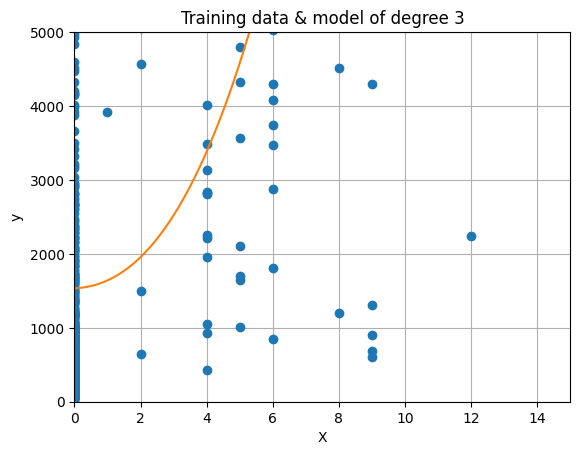

For lambda = 10000
Order:  1
w:  [2.93882474e+03 1.47387566e+00]
X_tr_poly size: (650, 2)
max: 15.0
E_in:  44314599.843173
E_val: 25842426.3338722
-------------------------
Order:  2
w:  [2.80463297e+03 1.35572044e+00 1.48581366e+01]
X_tr_poly size: (650, 3)
max: 225.0
E_in:  39704183.62911773
E_val: 25884966.703442726
-------------------------
Order:  3
w:  [1.79008222e+03 3.34422623e-01 2.23263988e+00 1.26643008e+01]
X_tr_poly size: (650, 4)
max: 3375.0
E_in:  18091426.09704269
E_val: 32697554.123579618
-------------------------
Degree:  1
[[ 1.          0.        ]
 [ 1.          0.07537688]
 [ 1.          0.15075377]
 [ 1.          0.22613065]
 [ 1.          0.30150754]
 [ 1.          0.37688442]
 [ 1.          0.45226131]
 [ 1.          0.52763819]
 [ 1.          0.60301508]
 [ 1.          0.67839196]
 [ 1.          0.75376884]
 [ 1.          0.82914573]
 [ 1.          0.90452261]
 [ 1.          0.9798995 ]
 [ 1.          1.05527638]
 [ 1.          1.13065327]
 [ 1.          1.206

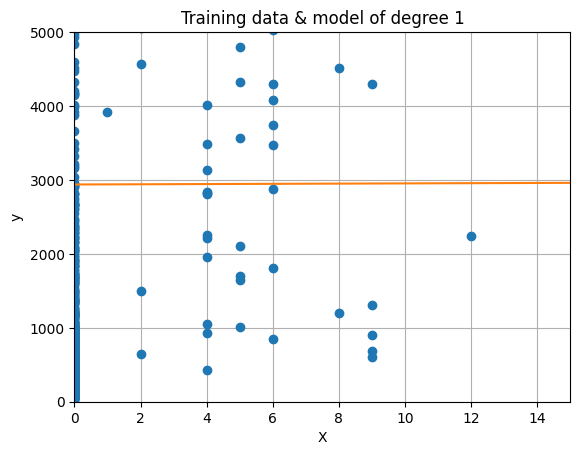

Degree:  2
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+00]
 [1.00000000e+00 1.20603015e+00 1.45450872e+00]
 [1.00000000e+00 1.28140704e+00 1.64200399e+00]
 [1.00000000e+00 1.35678392e+00 1.84086260e+00]
 [1.00000000e+00 1.43216080e+00 2.05108457e+00]
 [1.00000000e+00 1.50753769e+

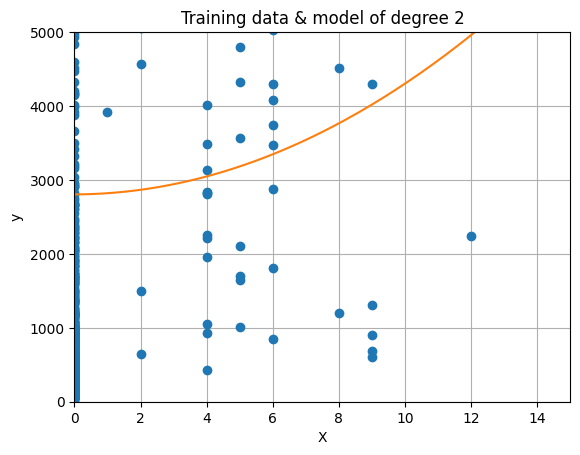

Degree:  3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03 4.28266938e-04]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02 3.42613550e-03]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02 1.15632073e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02 2.74090840e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01 5.35333672e-02]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01 9.25056585e-02]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01 1.46895560e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01 2.19272672e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01 3.12206597e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01 4.28266938e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01 5.70023294e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01 7.40045268e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01 9.40902462e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00 1.17516448e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+

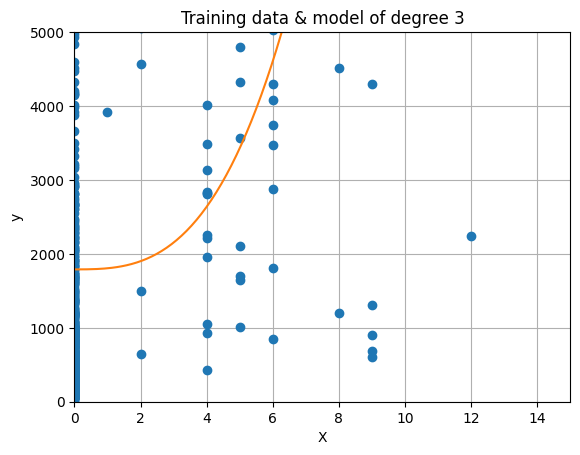

For lambda = 100000000000
Order:  1
w:  [2.94039385e+03 1.47504099e-07]
X_tr_poly size: (650, 2)
max: 15.0
E_in:  44358063.203610644
E_val: 25842967.591773216
-------------------------
Order:  2
w:  [2.94039383e+03 1.47504098e-07 1.62056667e-06]
X_tr_poly size: (650, 3)
max: 225.0
E_in:  44358062.67836337
E_val: 25842967.58498721
-------------------------
Order:  3
w:  [2.94039212e+03 1.47503928e-07 1.62056459e-06 1.91444014e-05]
X_tr_poly size: (650, 4)
max: 3375.0
E_in:  44357989.37669222
E_val: 25842966.52548336
-------------------------
Degree:  1
[[ 1.          0.        ]
 [ 1.          0.07537688]
 [ 1.          0.15075377]
 [ 1.          0.22613065]
 [ 1.          0.30150754]
 [ 1.          0.37688442]
 [ 1.          0.45226131]
 [ 1.          0.52763819]
 [ 1.          0.60301508]
 [ 1.          0.67839196]
 [ 1.          0.75376884]
 [ 1.          0.82914573]
 [ 1.          0.90452261]
 [ 1.          0.9798995 ]
 [ 1.          1.05527638]
 [ 1.          1.13065327]
 [ 1.     

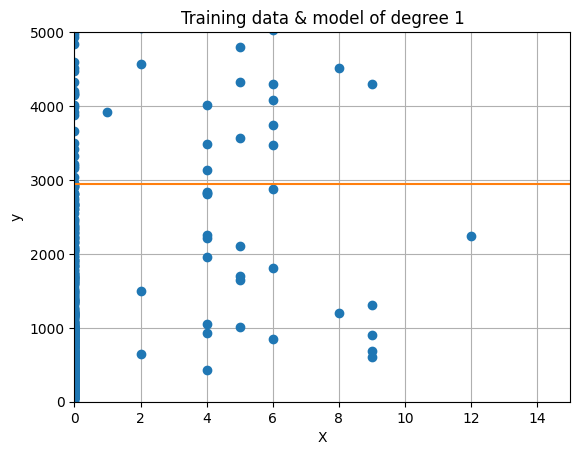

Degree:  2
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+00]
 [1.00000000e+00 1.20603015e+00 1.45450872e+00]
 [1.00000000e+00 1.28140704e+00 1.64200399e+00]
 [1.00000000e+00 1.35678392e+00 1.84086260e+00]
 [1.00000000e+00 1.43216080e+00 2.05108457e+00]
 [1.00000000e+00 1.50753769e+

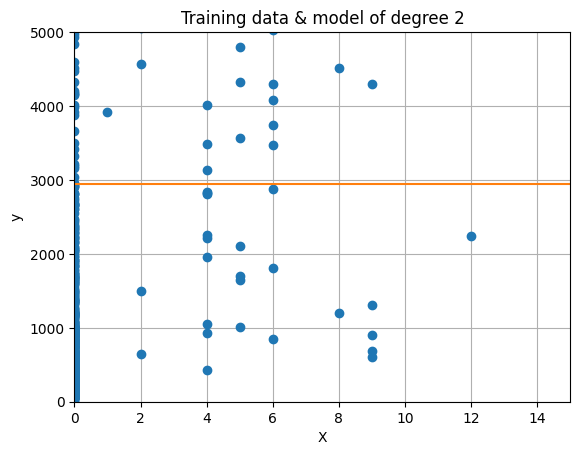

Degree:  3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.53768844e-02 5.68167471e-03 4.28266938e-04]
 [1.00000000e+00 1.50753769e-01 2.27266988e-02 3.42613550e-03]
 [1.00000000e+00 2.26130653e-01 5.11350723e-02 1.15632073e-02]
 [1.00000000e+00 3.01507538e-01 9.09067953e-02 2.74090840e-02]
 [1.00000000e+00 3.76884422e-01 1.42041868e-01 5.35333672e-02]
 [1.00000000e+00 4.52261307e-01 2.04540289e-01 9.25056585e-02]
 [1.00000000e+00 5.27638191e-01 2.78402061e-01 1.46895560e-01]
 [1.00000000e+00 6.03015075e-01 3.63627181e-01 2.19272672e-01]
 [1.00000000e+00 6.78391960e-01 4.60215651e-01 3.12206597e-01]
 [1.00000000e+00 7.53768844e-01 5.68167471e-01 4.28266938e-01]
 [1.00000000e+00 8.29145729e-01 6.87482639e-01 5.70023294e-01]
 [1.00000000e+00 9.04522613e-01 8.18161158e-01 7.40045268e-01]
 [1.00000000e+00 9.79899497e-01 9.60203025e-01 9.40902462e-01]
 [1.00000000e+00 1.05527638e+00 1.11360824e+00 1.17516448e+00]
 [1.00000000e+00 1.13065327e+00 1.27837681e+

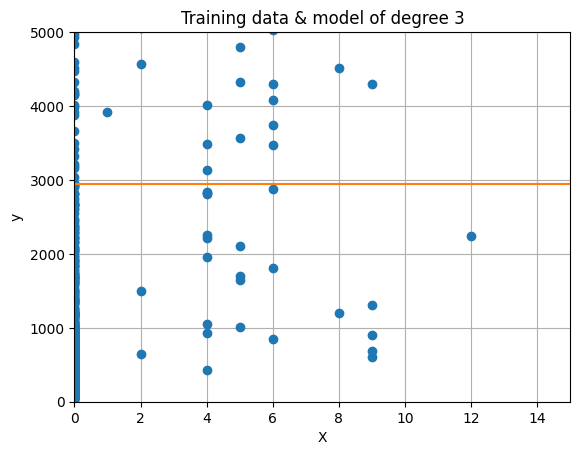

In [ ]:
total_validation = {}
total_train = {}
total_w = {}
model_degree = range(1,4)

lambdas = [0, 0.0001, 0.1, 10, 100, 10000, 100000000000]

for l in lambdas:
  print("For lambda = " + str(l))
  validation_costs = []
  train_costs = []
  w_dict = {}
  # perform LR for different polynomial transformations
  poly_regression_ein_eout(model_degree, X_train, X_test, y_train, y_test, l)
  # plot hypothesis against training data
  poly_regression_plot_poly_models(model_degree, X_train, y_train)
  # save all validation/training costs
  total_validation[l] = validation_costs
  total_train[l] = train_costs
  total_w[l] = total_w





Out of all of the graphs generated, Degree 1 continuously has the lowest E_in, but Degree 2 has a slightly higher E_in with

Some other things I tried below + training/validation/weights

In [ ]:
# We can try LR on different features as well to see how well they predict a clan's points:

# We can try mean member trophies
X_2 = df_sample['mean_member_trophies'].to_numpy()
y = df_sample['clan_points'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

# Let's plot X_train and y_train to see the distribution of training data
plt.plot(X_train,y_train,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

y_test = y_test.reshape(y_test.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

total_validation_p2 = {}
total_train_p2 = {}
total_w_p2 = {}


lambdas = [0.1, 0, 10, 100, 10000, 100000000000]

for l in lambdas:
  print("For lambda = " + str(l))
  validation_costs = []
  train_costs = []
  w_dict = {}
  # perform LR for different polynomial transformations
  poly_regression_ein_eout(model_degree, X_train, X_test, y_train, y_test)
  # plot hypothesis against training data
  poly_regression_plot_poly_models(model_degree, X_train, y_train)
  # save all validation/training costs
  total_validation_p2[l] = validation_costs
  total_train_p2[l] = train_costs
  total_w_p2[l] = total_w



In [ ]:
# We can try required townhall level. This one won't look that nice since townhall level isn't continuous
X_2 = df_sample['clan_capital_hall_level'].to_numpy()
y = df_sample['clan_points'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

# Let's plot X_train and y_train to see the distribution of training data
plt.plot(X_train,y_train,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

y_test = y_test.reshape(y_test.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

total_validation_p2 = {}
total_train_p2 = {}
total_w_p2 = {}


lambdas = [0, 0.0001, 0.1, 10, 100, 10000, 100000000000]

for l in lambdas:
  print("For lambda = " + str(l))
  validation_costs = []
  train_costs = []
  w_dict = {}
  # perform LR for different polynomial transformations
  poly_regression_ein_eout(model_degree, X_train, X_test, y_train, y_test, lambda1)
  # plot hypothesis against training data
  poly_regression_plot_poly_models(model_degree, X_train, y_train)
  # save all validation/training costs
  total_validation_p2[l] = validation_costs
  total_train_p2[l] = train_costs
  total_w_p2[l] = total_w

In [ ]:

print(total_validation)

print(total_train)
for w in total_w:
  print(total_w[w])

print("For lambda = 0")
print(total_validation[0])

for v in total_validation:
  imin = np.argmin(total_validation[v])
  print(total_validation[v][imin])
  # print()

for v in total_train:
  imin = np.argmin(total_train[v])
  print(total_train[v][imin])

{0: [45362619.19415445, 41869343.73286389, 42638880.21964071], 0.0001: [45362116.58043704, 41869136.635632634, 42638804.18574177], 0.1: [44869427.78979207, 41684786.73301679, 42586378.79304011], 10: [29475708.70948438, 40038254.414232805, 40835587.3519033], 100: [25900160.032741413, 37465917.16516559, 36228123.80679891], 10000: [25842426.3338722, 25884966.703442726, 32697554.123579618], 100000000000: [25842967.591773216, 25842967.58498721, 25842966.52548336]}
{0: [16839944.659920704, 14968342.631868327, 14918530.655587804], 0.0001: [16839944.664322488, 14968342.63438013, 14918530.65661768], 0.1: [16844237.286543522, 14970358.800291061, 14918878.380396098], 10: [25422028.62989066, 15129255.612917965, 14999587.397231098], 100: [40473157.570143566, 15439019.98667595, 16249083.587953668], 10000: [44314599.843173, 39704183.62911773, 18091426.09704269], 100000000000: [44358063.203610644, 44358062.67836337, 44357989.37669222]}
{0: {...}, 0.0001: {...}, 0.1: {...}, 10: {...}, 100: {...}, 10000